# 시각화 모듈(라이브러리)

- Matplotlib
- Seaborn

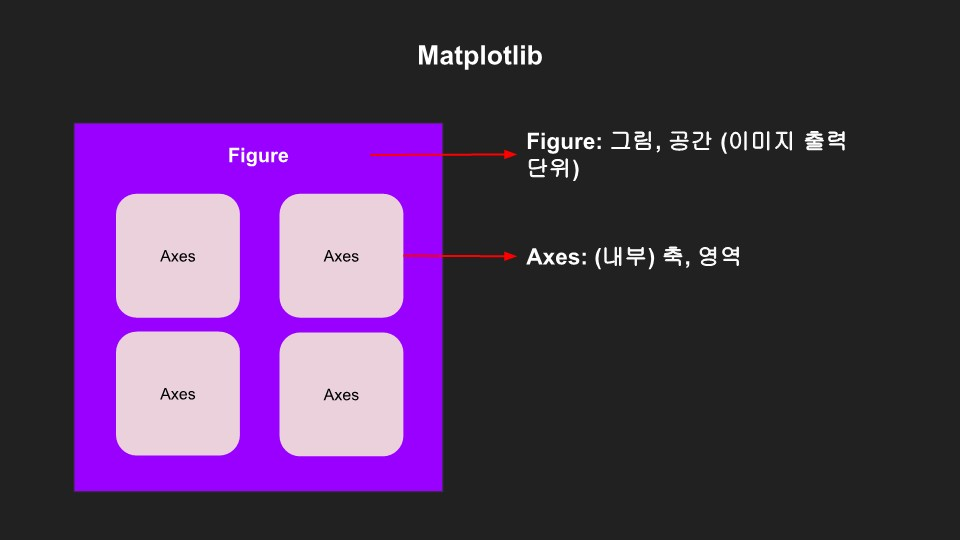

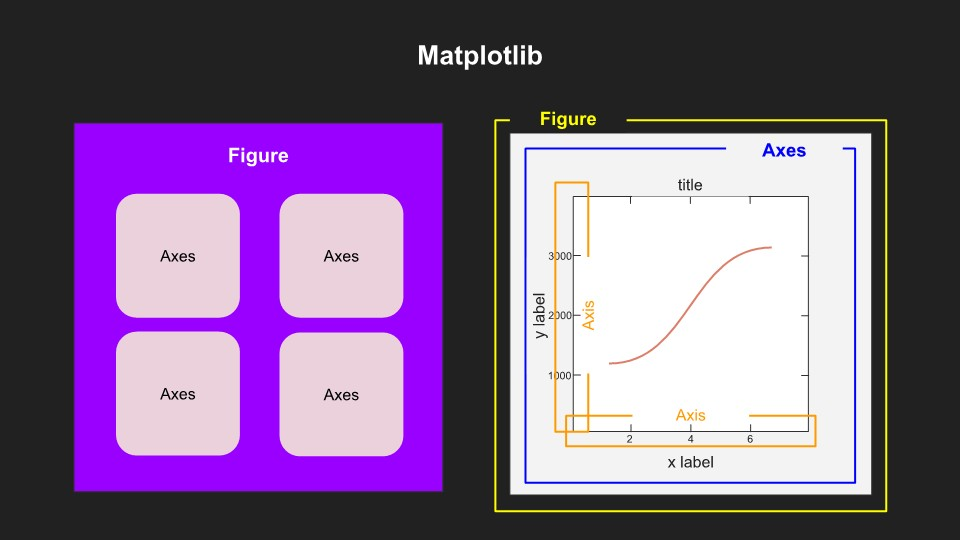

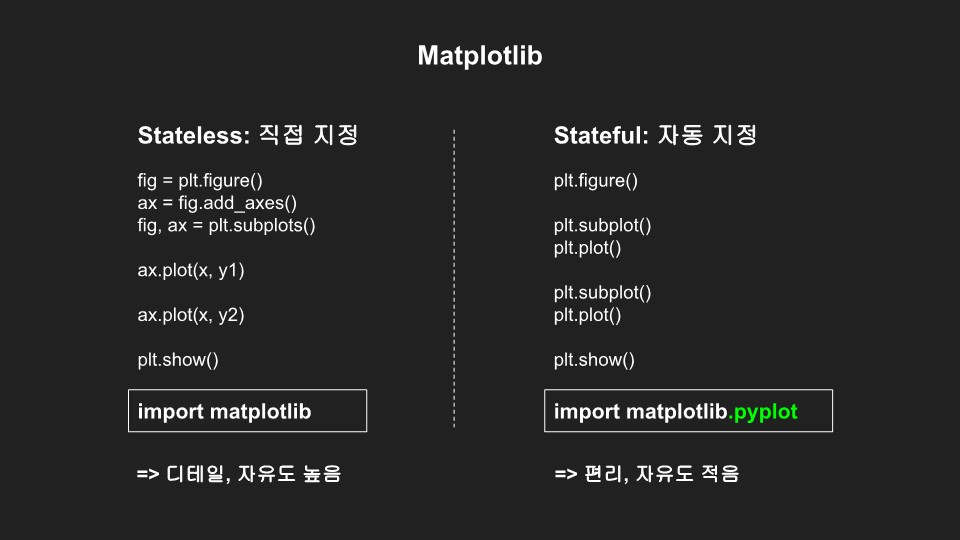

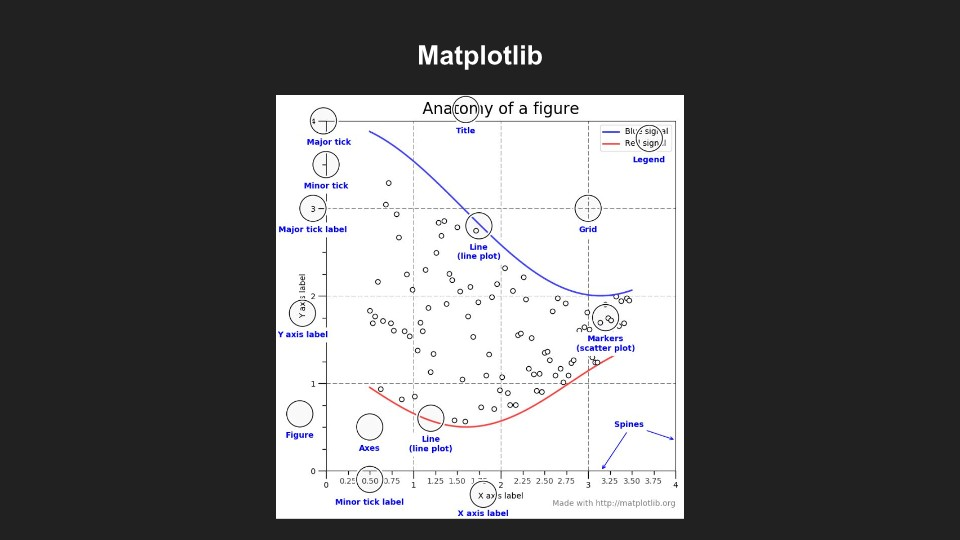

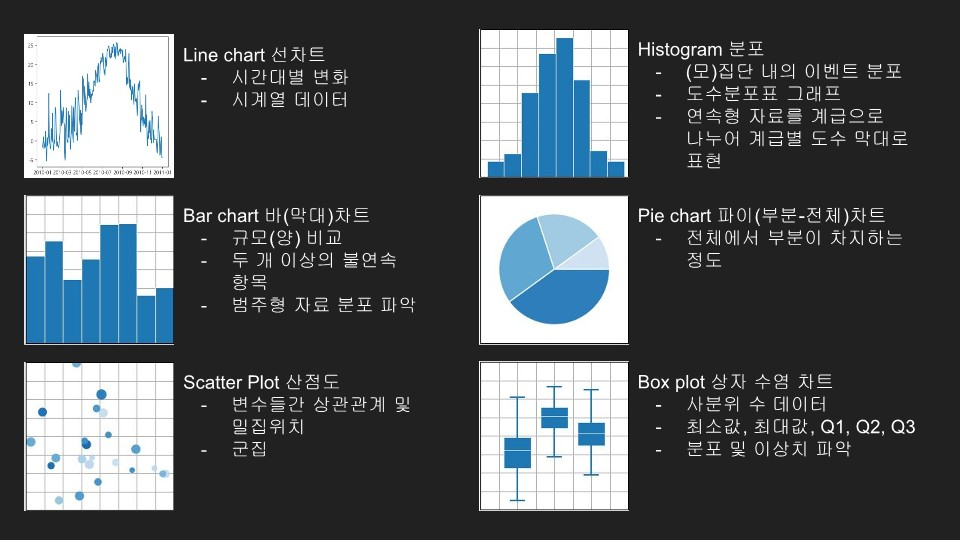

## seaborn

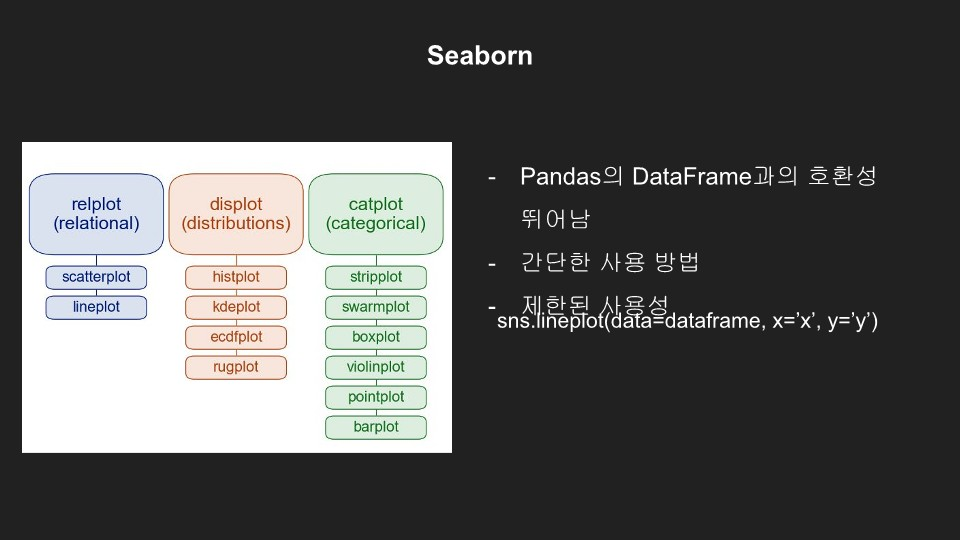

In [2]:
import seaborn as sns

In [3]:
# seaborn에서 제공하는 데이터셋

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

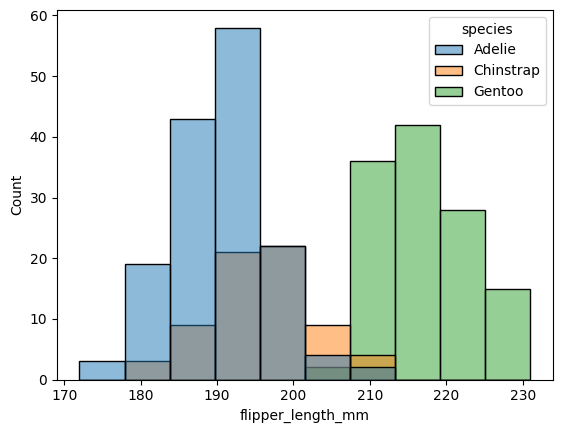

In [4]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species') 

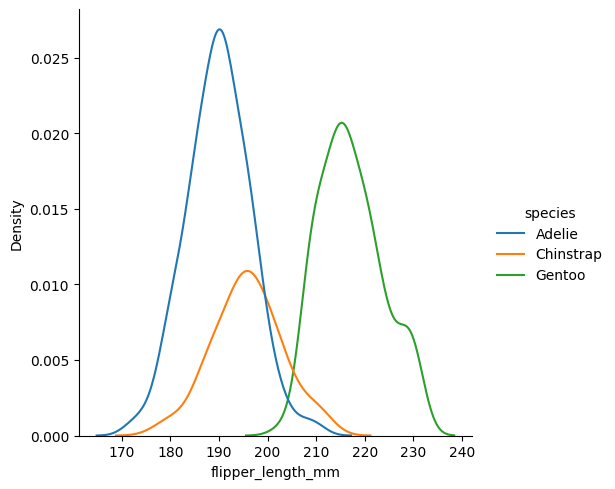

In [5]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde') # kde = 커널밀도추정

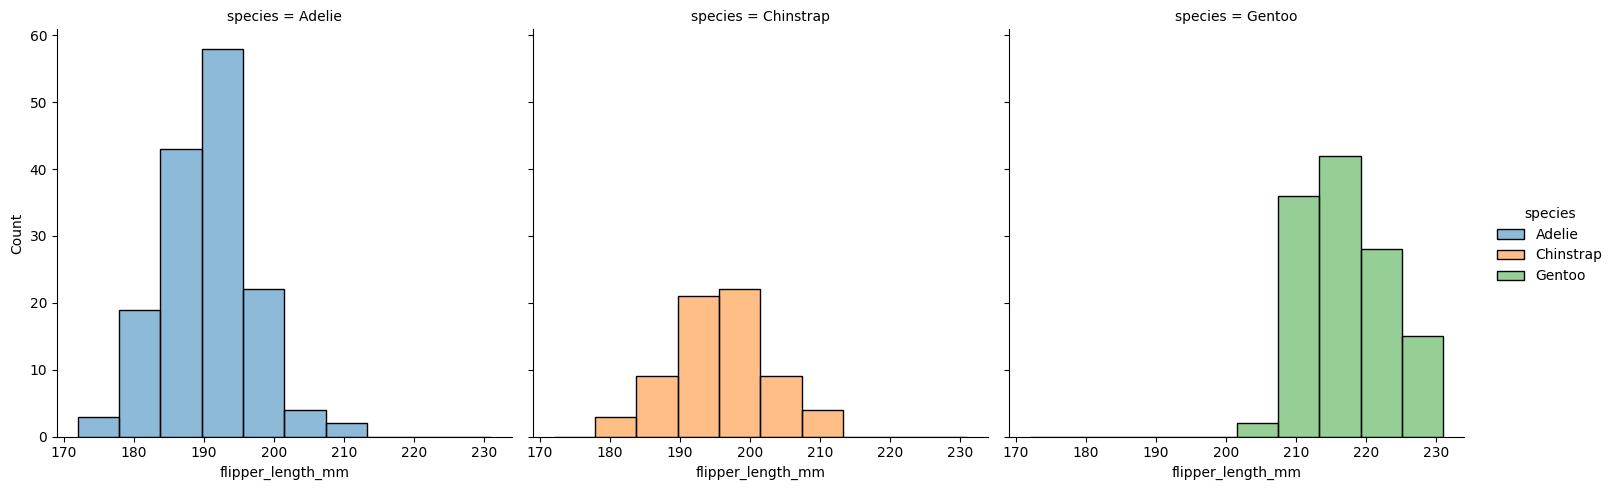

In [6]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

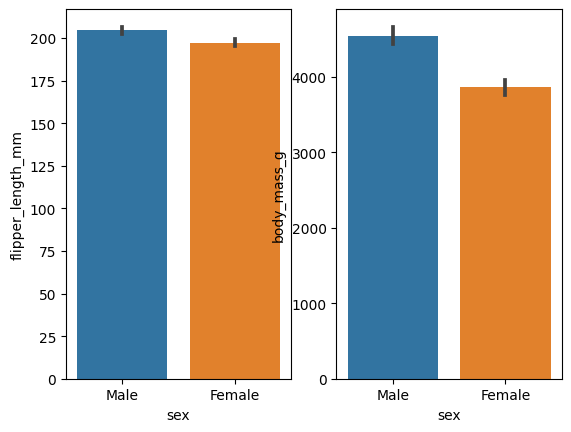

In [7]:
import matplotlib.pyplot as plt

# stateless 방법으로 subplot 지정 (행, 열)
f, ax = plt.subplots(1, 2)

# 첫 번째 서브플롯 그리기
sns.barplot(data=penguins, x='sex', y='flipper_length_mm', ax=ax[0])
# 두 번째 서브플롯 그리기
sns.barplot(data=penguins, x='sex', y='body_mass_g', ax=ax[1])
# 그래프 출력
plt.show()

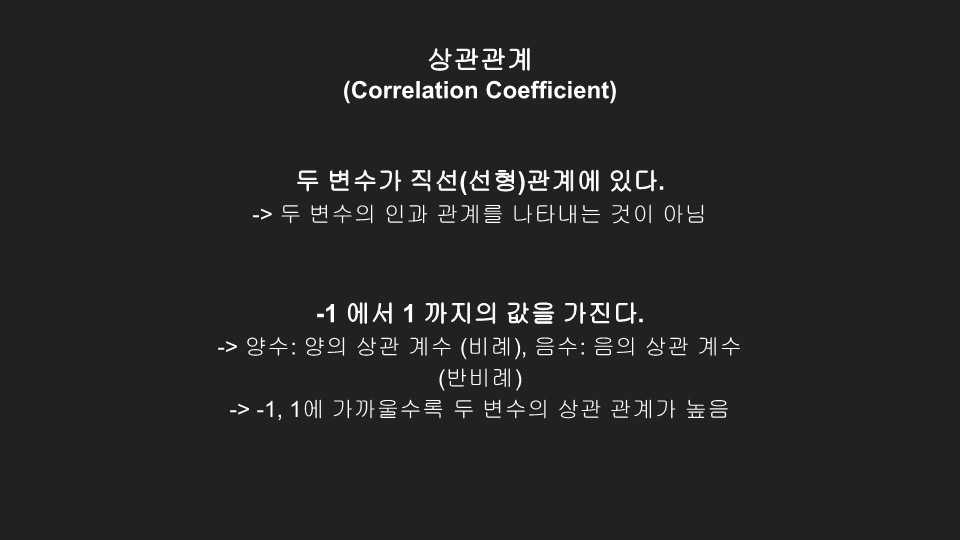

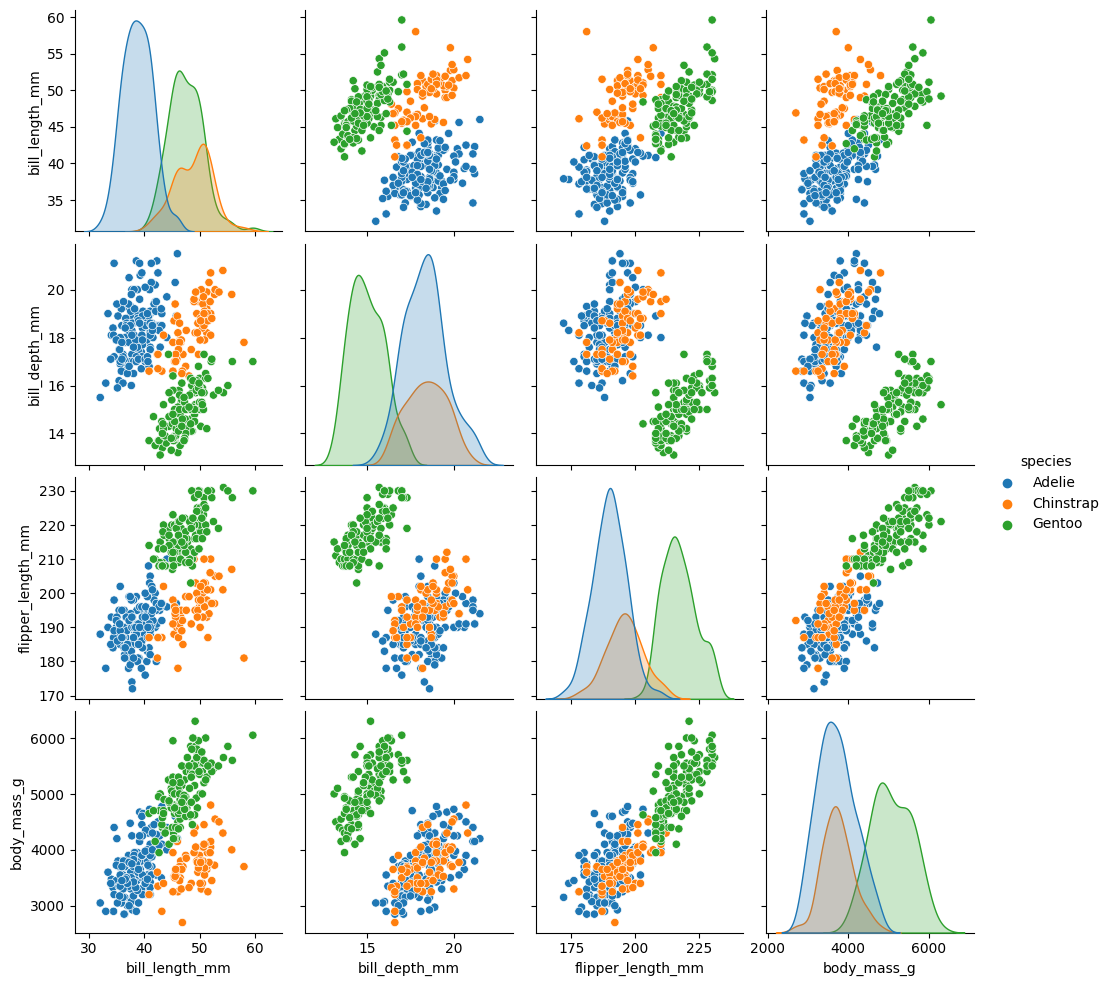

In [ ]:
sns.pairplot(data=penguins, hue='species') # 상관관계에 대한 그래프 -> 변수들 간의 상관관계를 한 눈에 보여줌.

<ipython-input-8-f7388dd7e55f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')


<Axes: xlabel='Task', ylabel='Model'>

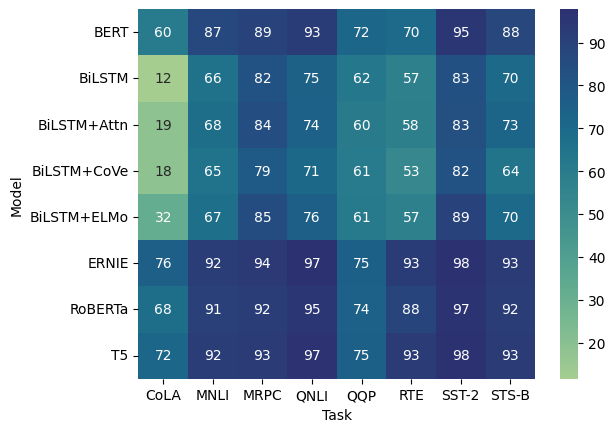

In [ ]:
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score')
sns.heatmap(glue, annot = True, cmap='crest')

In [ ]:
# 변수 간 상관관계 -> pairplot, heatmap

# 상관관계

- 두 변수 간의 선형 관계(비례, 반비례)를 설명
- 상관관계에 있다고 해서 인과관계를 가지는 것은 아님
- -1 ~ 1 -> 양 끝 값에 가까울수록 상관성이 높음

In [ ]:
# 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는 지, 어떻게 해석할 지

# 불러오고, 살펴보고, 전처리하고 > 상관관계 추가

# IBM Attrtion 데이터

- IMB에서 만든 데이터(가상 데이터)
- 여러 변수들(연봉, 직업만족도 ...) -> 퇴사
- 여러 변수들 + 퇴사


- 연봉, 만족도, 가족, ...., 퇴사(o)
- 연봉, 만족도, 가족, ...., 퇴사(x)

In [8]:
# 파일명: WA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as so

In [ ]:
df = pd.read_csv('WA.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
df.info() # 데이터 타입 -> int, float는 크게 상관이 없으나, object는 신경을 써야한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df = df[:1000] # 용량이 너무 커서 샘플 뽑아서하기
df.shape

(1000, 35)

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 데이터 전처리

- data type
- drop

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# object(string) -> 내가 어떤 형태로 변환을 해야하는가?
# object 인식이 어려운 경우가 많음 -> 2가지 : one-hot encoding(0,1), 여러종류 : labelencoding(0, 1, 2, 3, ...)

#### 전체 데이터의 컬럼별 분산(히스토그램) 확인하기

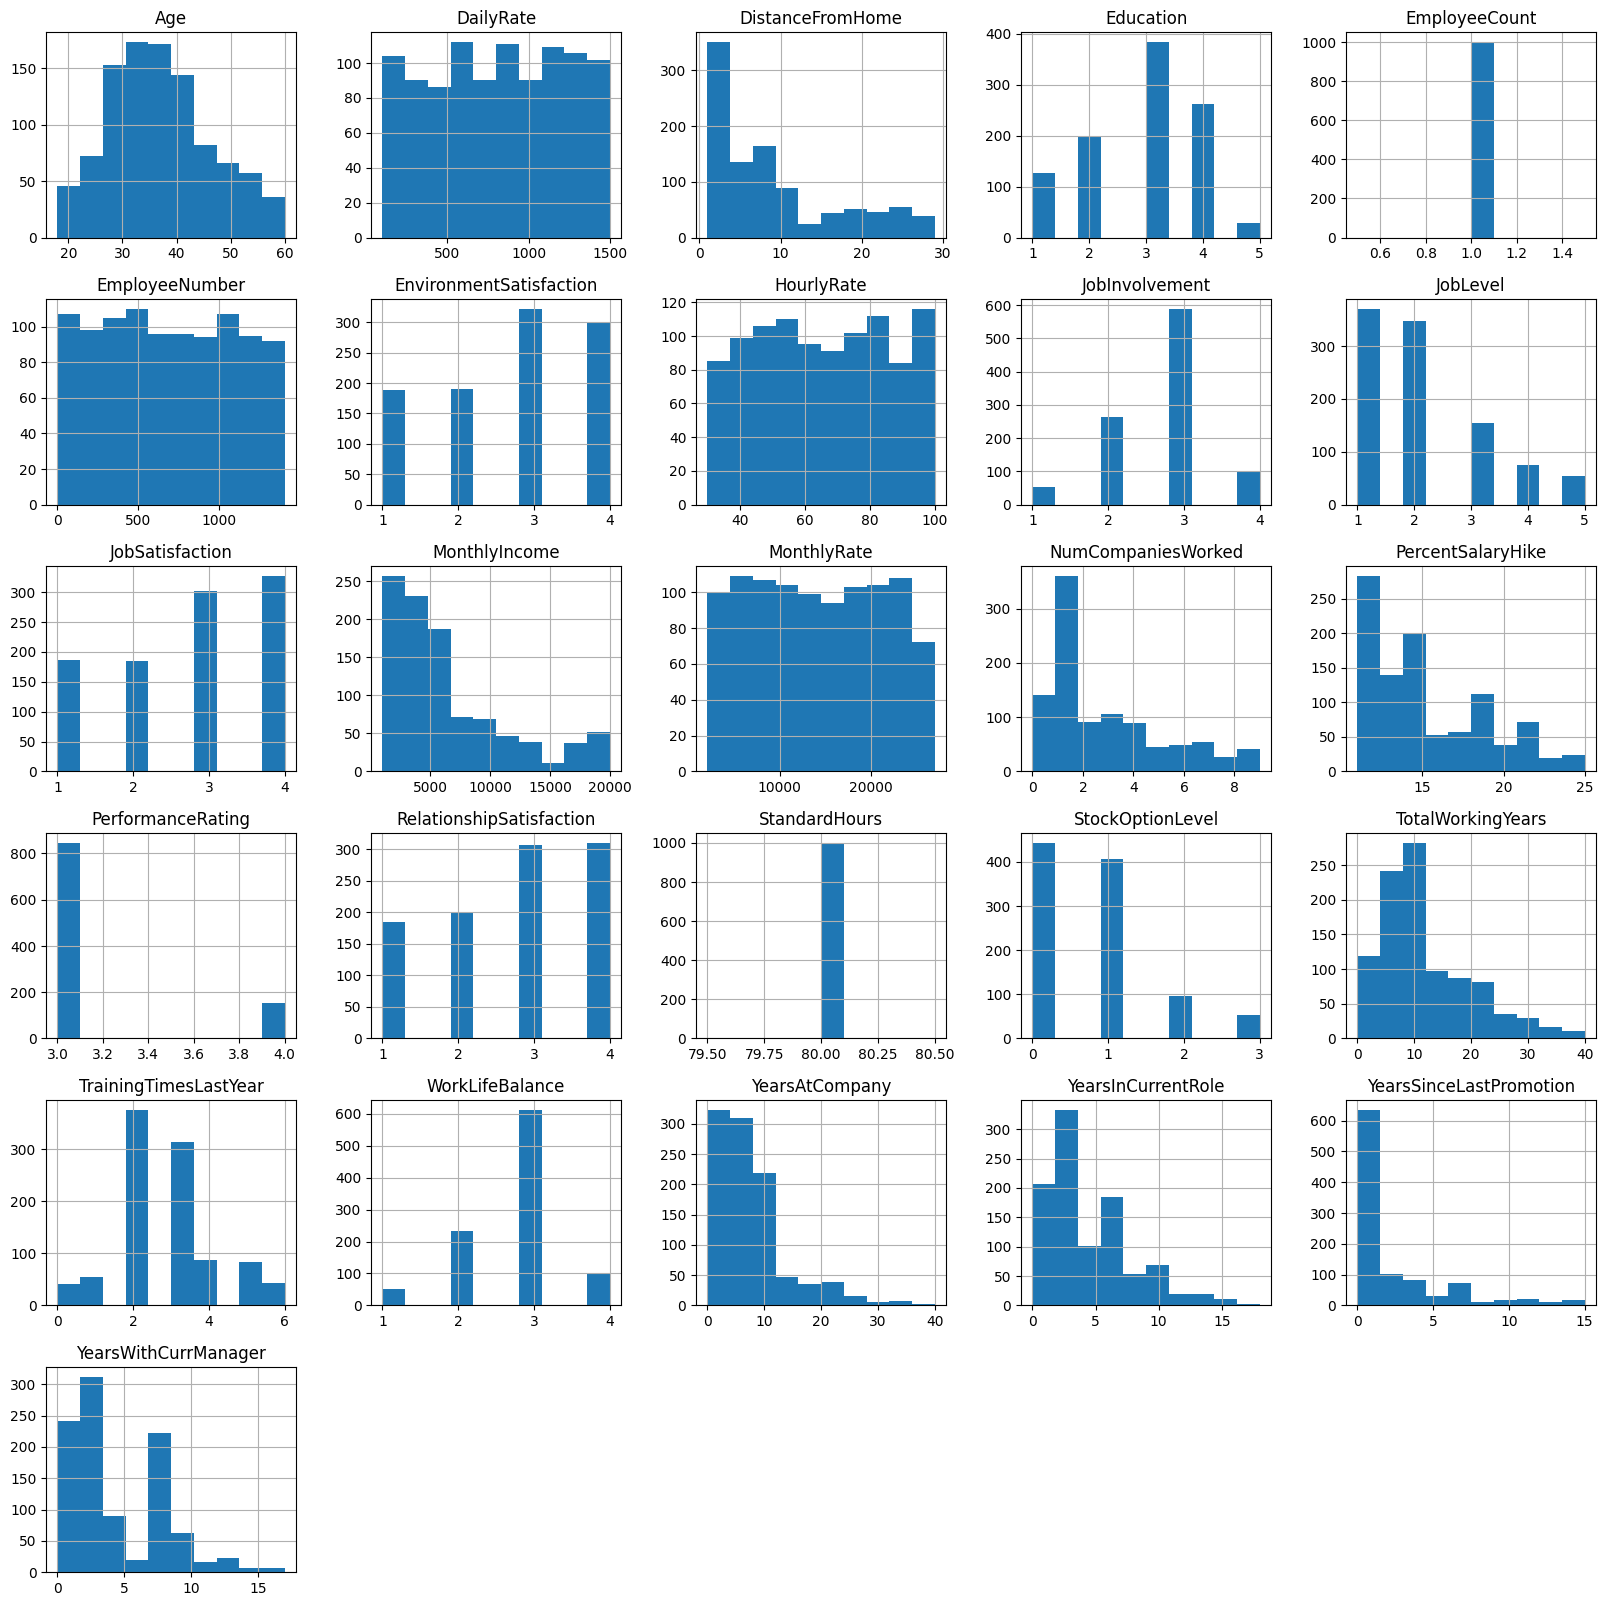

In [ ]:
df.hist(figsize=(20, 20))
plt.show()

In [ ]:
# Attrition 퇴사인지 아닌지
df['Attrition'].value_counts()

No     833
Yes    167
Name: Attrition, dtype: int64

#### 변수간 상관관계 확인하기

In [ ]:
# 상관관계 파악하기

corr = df.corr()
corr.shape

<ipython-input-25-b682000dd119>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(26, 26)

<Axes: >

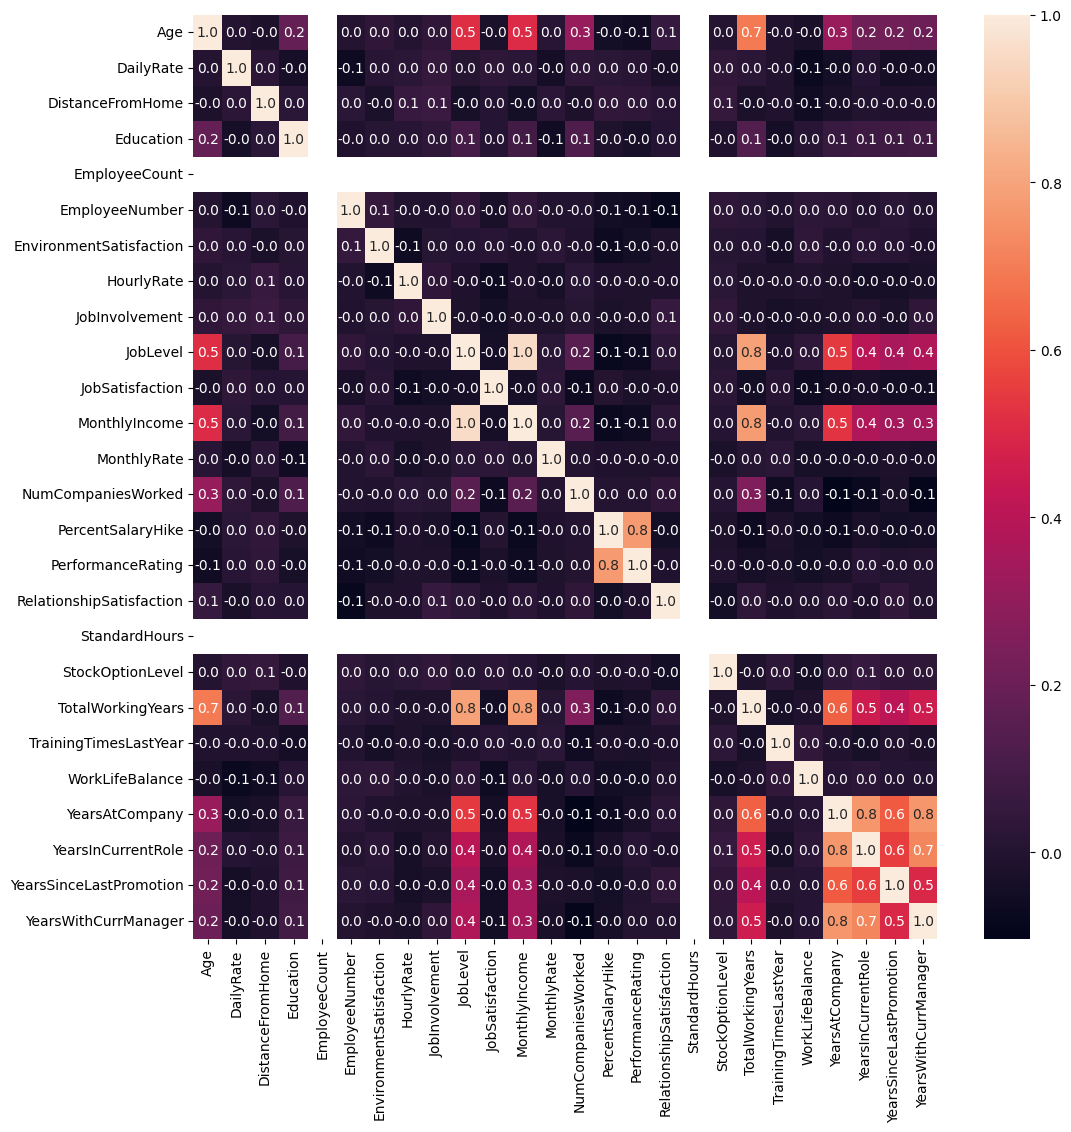

In [ ]:
plt.figure(figsize=(12, 12))

so.heatmap(corr, fmt='.1f', annot=True) # 문자로 된 컬럼들이 빠져있다. Attrition
# -1, 1 양 끝 값에 가까울수록 상관관계
# 0.3 < a : 상관관계가 있다.
# 0.7 < a : 상관관계가 높다.
# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7
# 0.5 이상의 값들 찾아보기

In [ ]:
# EmployeeCount
# StandardHours
# drop

In [ ]:
df['EmployeeCount'].head()

0    1
1    1
2    1
3    1
4    1
Name: EmployeeCount, dtype: int64

In [ ]:
df['StandardHours'].head()

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

## 필요없는 데이터 drop 시키기

In [ ]:
# EmployeeCount, StandardHours

In [ ]:
df = df.drop(['EmployeeCount','StandardHours'], axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## 상관관계가 높은 변수들 위주로 데이터 탐색하기

In [ ]:
# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

#### 전체 직원 중 퇴사 인원 비율 확인하기

In [ ]:
# 전체 직원 중 퇴사 인원 비율
# df['Attrition'] / df.count()
attrition = df['Attrition'][df['Attrition'] == 'Yes'].count()
total = df['Attrition'].count()
print(attrition)
print(total)

167
1000


In [ ]:
attrition_p = (attrition / total) * 100
attrition_p
# 전체 직원 중 16.7%가 퇴사를 했다.

16.7

In [ ]:
n_attrition = 100 - attrition_p

In [ ]:
# pie graph

([<matplotlib.patches.Wedge at 0x7f2fb7b289d0>,
 [Text(0.9520514449129607, 0.5509973196297274, 'Attrition'),
  Text(-0.9520514191189136, -0.5509973641984715, 'Working')],
 [Text(0.5193007881343421, 0.30054399252530584, '16.7%'),
  Text(-0.5193007740648619, -0.30054401683552984, '83.3%')])

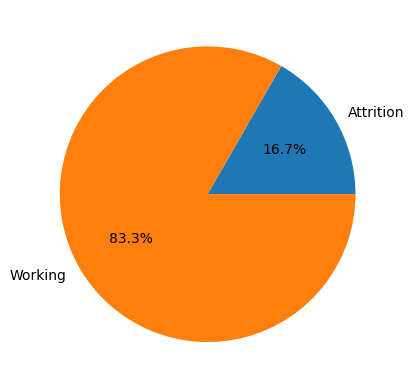

In [ ]:
label = ['Attrition', 'Working']
plt.pie([attrition_p, n_attrition], labels=label, autopct='%.1f%%')

#### 직업 수준(Job level)에 따른 퇴사 비율 확인하기

In [ ]:
# 직업 레벨에 따른 퇴사 비율
df['JobLevel'].head()

0    2
1    2
2    1
3    1
4    1
Name: JobLevel, dtype: int64

In [ ]:
df['JobLevel'].value_counts() # unique 값의 갯수
# Entry, Mid, Senior, Lead, Excutive

1    370
2    347
3    155
4     74
5     54
Name: JobLevel, dtype: int64

In [ ]:
# pandas Categorical
df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])

df['JobLevel'].value_counts()

Entry       370
Mid         347
Senior      155
Lead         74
Excutive     54
Name: JobLevel, dtype: int64

In [ ]:
attrition_joblevel = df['JobLevel'][df['Attrition'] == 'Yes'].value_counts()

In [ ]:
df['JobLevel'] # 전체레벨 분포
attrition_joblevel # 퇴사자들 중 레벨 분포

Entry       101
Mid          35
Senior       22
Excutive      5
Lead          4
Name: JobLevel, dtype: int64

In [ ]:
# x 축에 넣을 값
attrition_joblevel.index.values

['Entry', 'Mid', 'Senior', 'Excutive', 'Lead']
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import koreanize_matplotlib

In [ ]:
df['JobLevel'].sort_values(ascending=False) # 값의 크기에 따라서 1 - 5
# sort_values(ascending=True) 오름차순 -> 순서로 값을 정렬
# sort_values(bt='JobLevel') string,list : 오름차순

# 여러 컬럼들 -> 리스트

233    Excutive
899    Excutive
186    Excutive
329    Excutive
326    Excutive
         ...   
288       Entry
673       Entry
289       Entry
671       Entry
239       Entry
Name: JobLevel, Length: 1000, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

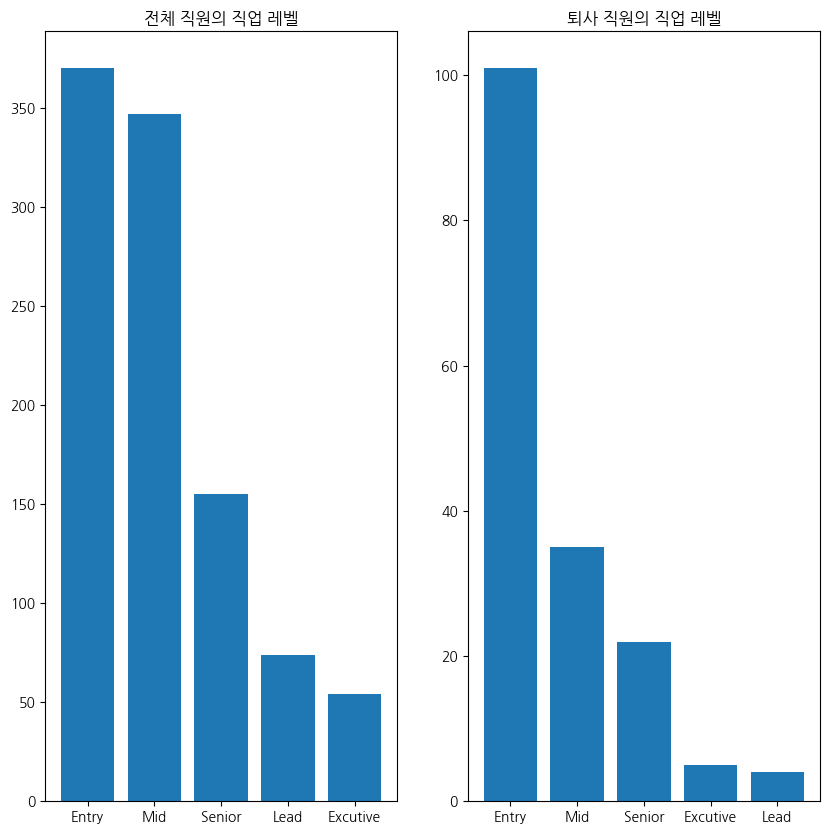

In [ ]:
#df['JobLevel'] bar
# df['JobLevel'].unique() # x
# df['JobLevel'].value_counts() # y

# 원래 전체 직원 수 중 JobLevel 분포
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('전체 직원의 직업 레벨')
plt.bar(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'], df['JobLevel'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 직업 레벨')
plt.bar(attrition_joblevel.index.values, attrition_joblevel)

plt.show()

#### 나이에 따른 퇴사 비율 확인하기

In [ ]:
# 나이에 따른 퇴사 비율
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [ ]:
df['Age'].value_counts()

35    51
34    49
30    45
36    44
31    42
33    41
32    41
29    41
37    39
38    37
27    35
40    35
42    33
28    32
26    29
41    29
45    27
39    24
50    24
43    23
46    22
44    21
25    20
51    18
24    16
52    16
55    15
53    14
49    12
47    12
48    12
22    12
54    12
58    10
59    10
21    10
20     9
19     9
56     9
23     7
18     6
60     4
57     3
Name: Age, dtype: int64

In [ ]:
df['Age'].describe()

count    1000.000000
mean       36.992000
std         9.417783
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [ ]:
# 나이대 구간 별로 나누기

# 10대 ~ 60대

df['Age_10'] = df['Age'][(df['Age'] >= 10) & (df['Age'] < 20)]
df['Age_20'] = df['Age'][(df['Age'] >= 20) & (df['Age'] < 30)]
df['Age_30'] = df['Age'][(df['Age'] >= 30) & (df['Age'] < 40)]
df['Age_40'] = df['Age'][(df['Age'] >= 40) & (df['Age'] < 50)]
df['Age_50'] = df['Age'][(df['Age'] >= 50) & (df['Age'] < 60)]
df['Age_60'] = df['Age'][(df['Age'] >= 60) & (df['Age'] < 70)]

# 구간 별로 카운팅


In [ ]:
# df['Age'] >= 10 & df['Age'] < 20:  10 이상 20 미만
# df['Age'] // 10 == 1: 10으로 나눴을 때 몫이 1
# (df['Age'] // 10) == 4

# 여러 개의 컬럼들이 생성되었음
# 합쳐주기 -> 병합: concat, merge
# join -> outer(합집합), inner(교집합), left(좌 기준), right(우 기준)
# concat
df['Age_10']  # 시리즈 형태(컬럼) : 인덱스가 같음

0      41.0
1      49.0
2       NaN
3       NaN
4       NaN
       ... 
995    43.0
996     NaN
997     NaN
998     NaN
999    42.0
Name: Age_40, Length: 1000, dtype: float64

In [ ]:
# 데이터프레임들(시리즈) 합칠때, outer, inner, left, right
# concat(outer), merge(inner)
# 컬럼 기준
ages = [df['Age_10'], df['Age_20'], df['Age_30'], df['Age_40'], df['Age_50'], df['Age_60']]
age_cols = pd.concat(ages, axis=1)

In [ ]:
import numpy as np

In [ ]:
# 조건에 따라서 값을 넣어줌
# 컬럼, 행으로 값을 넣어주어야함
# 행기준으로 데이터를 순회하면서 값이 있는 것을 새로운 컬럼에 넣어준다.

# numpy where
# np.where(조건, 참일 때 넣어줄 값, 거짓일때 넣어줄 값)
# padas loc

# 계속 바꿔주어야할 부분
# df['Ages'] = np.where(df['Age_10'].isnull() == False, df['Age_10'], 0)
col_name = list(age_cols.columns)
# ['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60']
col_dic = {
    'Age_10': 10,
    'Age_20': 20,
    'Age_30': 30
}

### 수정 코드
# 새로운 컬럼 생성
df['Ages'] = ''

# 연령대 컬럼을 하나의 컬럼으로 표현
for col, age in col_dic.items():
    df.loc[df[col].notnull(), 'Ages'] = age

# 컬럼 삭제: 선택사항
# df.drop(col_name, axis=1, inplace=True)

# 결과 확인
print(df['Ages'])

In [ ]:
# loc
# cities = region.loc[:, region.columns[:-1]]
# df.loc['label', 'col: 변하는 부분']

# boolean indexing
# 10대
# df['Age_10'][df.loc[:, 'Age_10'].isnull() == False] # series 형태
# 20대
# df['Age_20'][df.loc[:, 'Age_20'].isnull() == False] # series 형태
# 30대
# df['Age_30'][df.loc[:, 'Age_30'].isnull() == False] # series 형태

col_name
for i in col_name:
    df[i][df.loc[:,i].isnull() == False]

2      37.0
3      33.0
5      32.0
7      30.0
8      38.0
       ... 
986    39.0
989    37.0
990    33.0
991    32.0
992    39.0
Name: Age_30, Length: 413, dtype: float64

In [ ]:
col_name

['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60']

In [ ]:
age_cols.columns

Index(['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60'], dtype='object')

In [ ]:
df['Ages']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: Ages, Length: 1000, dtype: float64

In [ ]:
'''
행에 다른 값을 찾아갈 때

1. where
np.where(조건(반복되는 부분), 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)
-> for문을 이용해서 변하는 변수들을 바꿔줌

2. loc
df.loc['label(인덱스)'(, col(컬럼명))]
-> for문을 이용해서 변하는 변수들을 바꿔줌


## TIP. for문 순회할 때
원하는 값을 모으고 싶으면 for문 바깥에 변수(저장할 공간)를 선언해주어야함

'''

In [ ]:
# 데이터 확인 (null 값이 아닌 것)
# df['Age_10'][df['Age_10'].isnull() == False]
# np.where(조건, 참일 때 넣어줄 값, 거짓일때 넣어줄 값)


# where 조건 반복 코드
# 연령대 컬럼을 하나의 컬럼으로 표현

### 수정 코드
# df['Ages'] = np.where(df['Age_10'].isnull() == False, 10, None)
for col, age in col_dic.items():
    df['Ages'] = np.where(df[col].notnull(), age, df['Ages'])

In [ ]:
df['Ages'].value_counts()

10    15
Name: Ages, dtype: int64

In [ ]:
df[df.loc[:,'Age_10'].isnull() == False]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Age_10,Age_10_,Age_20,Age_30,Age_40,Age_50,Age_60,Ages
127,19,Yes,Travel_Rarely,528,Sales,22,1,Marketing,167,4,...,0,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
149,19,No,Travel_Rarely,1181,Research & Development,3,1,Medical,201,2,...,0,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
171,19,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,235,3,...,0,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
177,19,Yes,Travel_Rarely,303,Research & Development,2,3,Life Sciences,243,2,...,1,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,...,0,0,18.0,1,NaN,NaN,NaN,NaN,NaN,10
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,411,4,...,0,0,18.0,1,NaN,NaN,NaN,NaN,NaN,10
422,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,566,1,...,0,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,...,0,0,18.0,1,NaN,NaN,NaN,NaN,NaN,10
688,19,Yes,Travel_Rarely,419,Sales,21,3,Other,959,4,...,0,0,19.0,1,NaN,NaN,NaN,NaN,NaN,10
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,...,0,0,18.0,1,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
df['Ages'] = np.where(df['Age_20'].isnull() == False, 20, None)
df['Ages'].value_counts()

20    211
Name: Ages, dtype: int64

In [ ]:
# loc
# 조건
# df.loc[:, 'Age_10']
# df['Age_10'][df.loc[:, 'Age_10'].isnull() == False]
# 조건 -> 조건에 맞는 값을 새로운 컬럼에 넣어주기
# df[df.loc[:,'Age_10'].isnull() == False]  # df['Age_10']
df['Age_10'][df.loc[:,'Age_10'].isnull() == False]

127    19.0
149    19.0
171    19.0
177    19.0
296    18.0
301    18.0
422    19.0
457    18.0
688    19.0
727    18.0
828    18.0
853    19.0
892    19.0
909    19.0
972    18.0
Name: Age_10, dtype: float64

In [ ]:
# age_10 age_20
# age_10: [df.loc[:, 'Age_10'].isnull() == False] -> 인덱스

# nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis=0)

age_10 = df['Age'][df.loc[:,'Age_10'].isnull() == False] # 10대 고유 인덱스
age_20 = df['Age'][df.loc[:,'Age_20'].isnull() == False] # 20대 고유 인덱스
age_30 = df['Age'][df.loc[:,'Age_30'].isnull() == False] # 30대 고유 인덱스
age_40 = df['Age'][df.loc[:,'Age_40'].isnull() == False] # 40대 고유 인덱스
age_50 = df['Age'][df.loc[:,'Age_50'].isnull() == False] # 50대 고유 인덱스
age_60 = df['Age'][df.loc[:,'Age_60'].isnull() == False] # 60대 고유 인덱스

In [ ]:
# 10대 인덱스 (범주화)
a_10 = list(age_10.index)
df.loc[a_10, 'Ages'] = '10대'
print(df.loc[a_10, 'Ages'])

127    10대
149    10대
171    10대
177    10대
296    10대
301    10대
422    10대
457    10대
688    10대
727    10대
828    10대
853    10대
892    10대
909    10대
972    10대
Name: Ages, dtype: object


In [ ]:
# 20대 인덱스
a_20 = list(age_20.index)

# loc: 전체 데이터에서 index=4
# df.loc[a_10[0]]['Ages'] = '10대'
df.loc[a_20, 'Ages'] = '20대'

print(df.loc[a_20, 'Ages'])

4      20대
11     20대
14     20대
15     20대
17     20대
      ... 
984    20대
993    20대
996    20대
997    20대
998    20대
Name: Ages, Length: 211, dtype: object


In [ ]:
# merge
pd.merge(age_10, age_20, how='outer')

,Age
0,19
1,19
2,19
3,19
4,19
...,...
221,25
222,25
223,25
224,25


In [ ]:
a_30 = list(age_30.index)
a_40 = list(age_40.index)
a_50 = list(age_50.index)
a_60 = list(age_60.index)

df.loc[a_30, 'Ages'] = '30대'
df.loc[a_40, 'Ages'] = '40대'
df.loc[a_50, 'Ages'] = '50대'
df.loc[a_60, 'Ages'] = '60대'

In [ ]:
print(df['Ages'].value_counts())

30대    413
40대    226
20대    211
50대    131
10대     15
60대      4
Name: Ages, dtype: int64


In [ ]:
df['Ages'].head()

0    40대
1    40대
2    30대
3    30대
4    20대
Name: Ages, dtype: object

In [ ]:
df['Ages'].value_counts().index

Index(['30대', '40대', '20대', '50대', '10대', '60대'], dtype='object')

In [ ]:
# 퇴사 그래프
attrition_age = df['Ages'][df['Attrition'] == 'Yes']

In [ ]:
attrition_age.value_counts()

30대    60
20대    57
40대    24
50대    17
10대     9
Name: Ages, dtype: int64

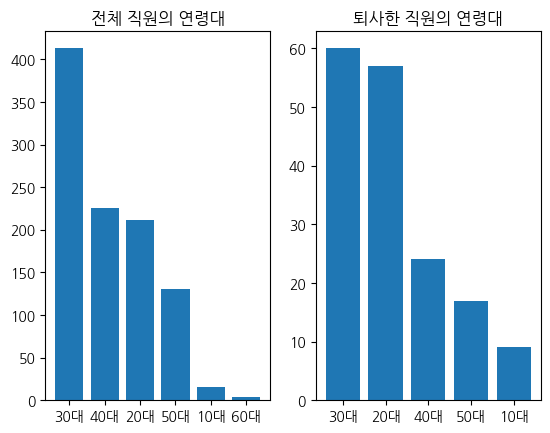

In [ ]:
# bar graph -> 전체 연령에 대한 그래프
# sort_value -> 정렬
plt.subplot(1, 2, 1)
plt.title('전체 직원의 연령대')
plt.bar(df['Ages'].value_counts().index, df['Ages'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사한 직원의 연령대')
plt.bar(attrition_age.value_counts().index, attrition_age.value_counts())
plt.show()

### 직급에 따른 연봉 확인하기

In [ ]:
# 직급에 따른 연봉

# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

df.columns
# 직급 : JobLevel
# 월수익 : MonthlyIncome * 12 -> 연봉 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Age_10', 'Age_10_', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60',
       'Ages'],
      dtype='object')

In [ ]:
df['JobLevel'].head()

0      Mid
1      Mid
2    Entry
3    Entry
4    Entry
Name: JobLevel, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [ ]:
df['annual_s'] = df['MonthlyIncome'] * 12
print(df['annual_s'])

0       71916
1       61560
2       25080
3       34908
4       41616
        ...  
995     48972
996     69228
997     28728
998     46848
999    201588
Name: annual_s, Length: 1000, dtype: int64


In [ ]:
# 직급별 연봉
# 기준이 되는 데이터, 적용할 데이터 -> groupby
# groupby('기준이 되는 데이터')['컬럼'].함수() -> mean 함수 사용
# nature.groupby('시/군/구')['검색건수'].sum()

job_annual_sal = df.groupby('JobLevel')['annual_s'].mean()

In [ ]:
job_annual_sal

JobLevel
Entry        33264.681081
Mid          65457.475504
Senior      118516.877419
Lead        185649.081081
Excutive    229540.888889
Name: annual_s, dtype: float64

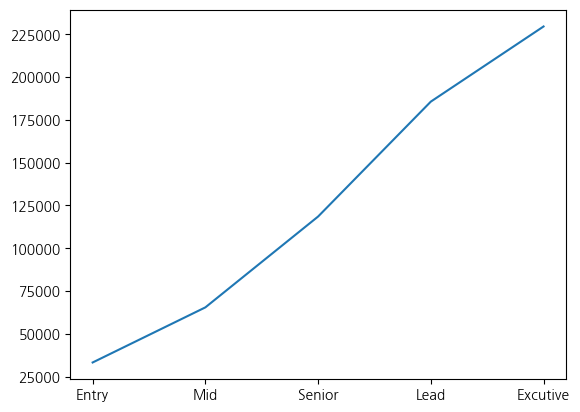

In [ ]:
# plot -> 연속된 값이 아니기 때문에 선그래프가 적절하지 않다.
plt.plot(job_annual_sal)
plt.show()

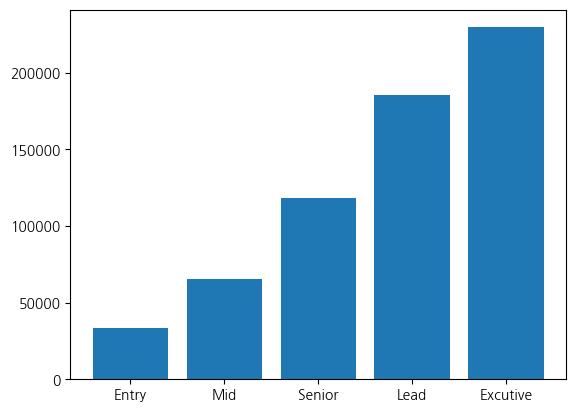

In [ ]:
# bar
plt.bar(job_annual_sal.index, job_annual_sal)
plt.show()

<Axes: xlabel='JobLevel', ylabel='annual_s'>

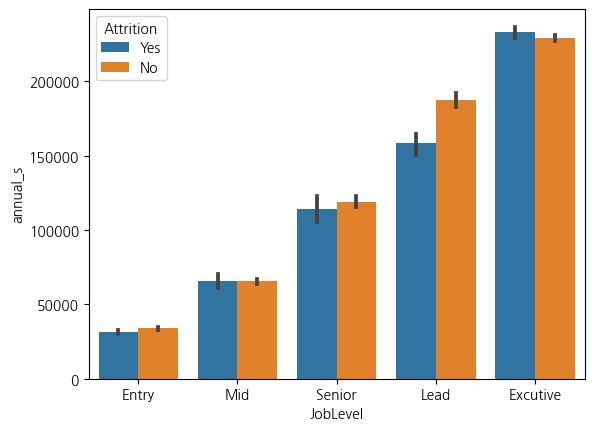

In [ ]:
# Seaborn 이용해서 그래프 그려보기
sns.barplot(data=df, x='JobLevel', y='annual_s', hue='Attrition')

# 그래프는 쉽게 그릴 수 있지만 퇴사자의 직급별 연봉 데이터는 따로 뽑아서 저장이 필요하다.

### 성별에 따른 퇴사 비율 확인하기

In [ ]:
# 성별에 따른 퇴사 비율 (퇴사자 중 남녀 성비)
# Gender

df['Gender'].value_counts()

Male      584
Female    416
Name: Gender, dtype: int64

In [ ]:
# 퇴사자를 먼저 뽑고
# 성별대로 분리

attrition_g = df['Gender'][df['Attrition'] == 'Yes']

In [ ]:
attrition_g

0      Female
2        Male
14       Male
21       Male
24       Male
        ...  
975      Male
980    Female
981    Female
985      Male
997    Female
Name: Gender, Length: 167, dtype: object

In [ ]:
# one-hot encoding: 텍스트(범주형) -> 숫자
# 남/녀, 정상/비정상, 오전/오후, ...
# 0/1
# Gender Male(0), Female(1)

# 1. 판다스에서 제공하는 get_dummies
# pd.get_dummies(df, columns=[])
oh_gender = pd.get_dummies(df, columns=['Gender'])
oh_gender['Gender_Female'][oh_gender['Gender_Female'] == 1].count()
# gender 별 분류를 하면 성별 카운팅 가능해진다.

416

In [ ]:
oh_gender['Gender_Male'][oh_gender['Gender_Male'] == 1].count() 

584

In [ ]:
# Scikitlearn 으로 one-hot 인코딩 가능 하다!

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit('값')

In [ ]:
# 연봉에 따른 퇴사 비율

In [ ]:
# 연차에 따른 퇴사 비율